## importing the relevant libraries

In [ ]:
df_test_hourly.head()

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),snowfall (cm),cloudcover (%),cloudcover_low (%),...,vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),city
0,2021-08-02 00:00:00,26.1,73.0,21.0,31.0,1010.9,1013.2,0.0,5.0,5.0,...,0.90,27.4,30.7,29.2,28.6,0.056,0.078,0.113,0.234,su
1,2021-08-02 01:00:00,25.6,75.0,20.8,31.0,1010.3,1012.6,0.0,5.0,5.0,...,0.82,26.9,30.6,29.2,28.6,0.056,0.078,0.113,0.234,su
2,2021-08-02 02:00:00,25.2,77.0,20.9,30.7,1010.3,1012.6,0.0,2.0,2.0,...,0.73,26.4,30.4,29.2,28.6,0.056,0.078,0.113,0.234,su
3,2021-08-02 03:00:00,24.7,78.0,20.7,30.1,1010.2,1012.5,0.0,9.0,10.0,...,0.68,25.9,30.3,29.2,28.6,0.056,0.078,0.113,0.234,su
4,2021-08-02 04:00:00,24.2,80.0,20.6,30.2,1010.7,1013.0,0.0,7.0,3.0,...,0.59,25.5,30.1,29.2,28.6,0.056,0.078,0.113,0.234,su


In [ ]:
pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.4 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.1-py2.py3-none-any.whl size=32166 sha256=83d370f5c3900d6c22803db2e9f4aedeab566d10f47191467ad13a6d2f7a5e14
  Stored in directory: /root/.cache/pip/wheels/2a/33/19/2a652d5065c412c5f4cdc0cb997f6be2077fe4701aa7a9a22f
Successfully built jcopml


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

from jcopml.plot import plot_missing_value

## loading the data

In [ ]:
df_test=pd.read_csv("test.csv", index_col="id", parse_dates=['time'])
df_test_hourly=pd.read_csv("test_hourly.csv", parse_dates=['time'])
df_test_hourly.dropna(inplace = True)

df_train=pd.read_csv("train.csv", parse_dates=['time'])
df_train.dropna(subset = ["rain_sum (mm)"],inplace = True)
df_train_hourly = pd.read_csv("train_hourly.csv",parse_dates=  ["time"])
df_train_hourly.dropna(inplace = True)
df_test.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation,city
id,,,,,,,,,,,,,,,
0,2021-08-02,32.3,25.3,38.2,29.6,2021-08-02T05:39,2021-08-02T17:30,20.79,0.0,7.6,16.9,134.0,4.45,0,su
1,2021-08-03,31.7,25.5,37.4,30.3,2021-08-03T05:39,2021-08-03T17:30,20.01,0.0,10.2,21.6,131.0,4.32,0,su
2,2021-08-04,32.6,25.7,37.1,30.8,2021-08-04T05:39,2021-08-04T17:30,20.89,0.0,17.3,32.4,116.0,4.73,0,su
3,2021-08-05,32.0,25.7,36.8,31.1,2021-08-05T05:39,2021-08-05T17:30,22.19,0.0,15.8,29.2,115.0,4.96,0,su
4,2021-08-06,31.9,26.3,36.0,31.6,2021-08-06T05:38,2021-08-06T17:30,21.84,0.0,20.2,36.7,106.0,4.99,0,su


## preposessing


In [ ]:
#AGREGRASI
dict_agg = {}
for col in df_train_hourly.columns:
    if col not in ["time","city"]:
        dict_agg[col] = ["mean","std","min","max" ]
def agg_data(df_hourly,df,dict_agg,freq):
    data = df_hourly.copy()
    data = data.groupby(["city",pd.Grouper(key="time",freq=freq)]).agg(dict_agg)
    data = data.reset_index()
    data["time_hour"] = data['time']
    data["time_hour"] = data['time_hour'].dt.hour
    data['time'] = data['time'].dt.date
    data.set_index(["time","city","time_hour"],inplace = True)
    #
    data = data.unstack(level=2)
    data.columns = data.columns = [x[0] + "_" + x[1] + "_" +str(x[2]) for x in data.columns.ravel()]
    data = data.reset_index()
    data['time'] = pd.to_datetime(data['time'])
    df = df.merge(data, on=["time","city"], how="left")
    return df

In [ ]:
df_train_merge = agg_data(df_train_hourly,df_train,dict_agg,"12H")
df_test_merge = agg_data(df_test_hourly,df_test,dict_agg,"12H")
df_train_merge.head()

<ipython-input-30-54b0c3a3345b>:16: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  data.columns = data.columns = [x[0] + "_" + x[1] + "_" +str(x[2]) for x in data.columns.ravel()]


,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),rain_sum (mm),snowfall_sum (cm),...,soil_moisture_28_to_100cm (m³/m³)_max_0,soil_moisture_28_to_100cm (m³/m³)_max_12,soil_moisture_100_to_255cm (m³/m³)_mean_0,soil_moisture_100_to_255cm (m³/m³)_mean_12,soil_moisture_100_to_255cm (m³/m³)_std_0,soil_moisture_100_to_255cm (m³/m³)_std_12,soil_moisture_100_to_255cm (m³/m³)_min_0,soil_moisture_100_to_255cm (m³/m³)_min_12,soil_moisture_100_to_255cm (m³/m³)_max_0,soil_moisture_100_to_255cm (m³/m³)_max_12
0,2018-01-01,29.9,26.0,36.3,31.6,2018-01-01T05:15,2018-01-01T17:49,17.59,7.7,0.0,...,0.283,0.284,0.280000,0.280000,0.000000,0.000000,0.280,0.280,0.280,0.280
1,2018-01-02,30.6,25.7,37.7,31.2,2018-01-02T05:15,2018-01-02T17:50,19.87,9.4,0.0,...,0.287,0.290,0.280000,0.280000,0.000000,0.000000,0.280,0.280,0.280,0.280
2,2018-01-03,31.8,25.9,40.3,31.7,2018-01-03T05:16,2018-01-03T17:50,20.44,7.8,0.0,...,0.292,0.293,0.280000,0.281000,0.000000,0.000000,0.280,0.281,0.280,0.281
3,2018-01-04,30.8,26.0,39.1,31.6,2018-01-04T05:16,2018-01-04T17:50,20.44,29.7,0.0,...,0.294,0.306,0.281000,0.281083,0.000000,0.000289,0.281,0.281,0.281,0.282
4,2018-01-05,30.9,25.2,37.6,29.9,2018-01-05T05:17,2018-01-05T17:51,20.10,22.5,0.0,...,0.314,0.322,0.282167,0.283417,0.000389,0.000515,0.282,0.283,0.283,0.284


In [ ]:
#viewing the dataframe

In [ ]:
df_train_merge.shape, df_test_merge.shape

((13198, 256), (4972, 255))

In [ ]:
df_train_merge.isna().sum()

time                                         0
temperature_2m_max (°C)                      0
temperature_2m_min (°C)                      0
apparent_temperature_max (°C)                0
apparent_temperature_min (°C)                0
                                            ..
soil_moisture_100_to_255cm (m³/m³)_std_12    0
soil_moisture_100_to_255cm (m³/m³)_min_0     0
soil_moisture_100_to_255cm (m³/m³)_min_12    0
soil_moisture_100_to_255cm (m³/m³)_max_0     0
soil_moisture_100_to_255cm (m³/m³)_max_12    0
Length: 256, dtype: int64

In [ ]:
df_test_merge.isnull().sum()

time                                         0
temperature_2m_max (°C)                      0
temperature_2m_min (°C)                      0
apparent_temperature_max (°C)                0
apparent_temperature_min (°C)                0
                                            ..
soil_moisture_100_to_255cm (m³/m³)_std_12    0
soil_moisture_100_to_255cm (m³/m³)_min_0     0
soil_moisture_100_to_255cm (m³/m³)_min_12    0
soil_moisture_100_to_255cm (m³/m³)_max_0     0
soil_moisture_100_to_255cm (m³/m³)_max_12    0
Length: 255, dtype: int64

<ipython-input-36-65cac2bd73d9>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_train_merge = df_train_merge.fillna(df_train_merge.median())
<ipython-input-36-65cac2bd73d9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train_merge = df_train_merge.fillna(df_train_merge.median())


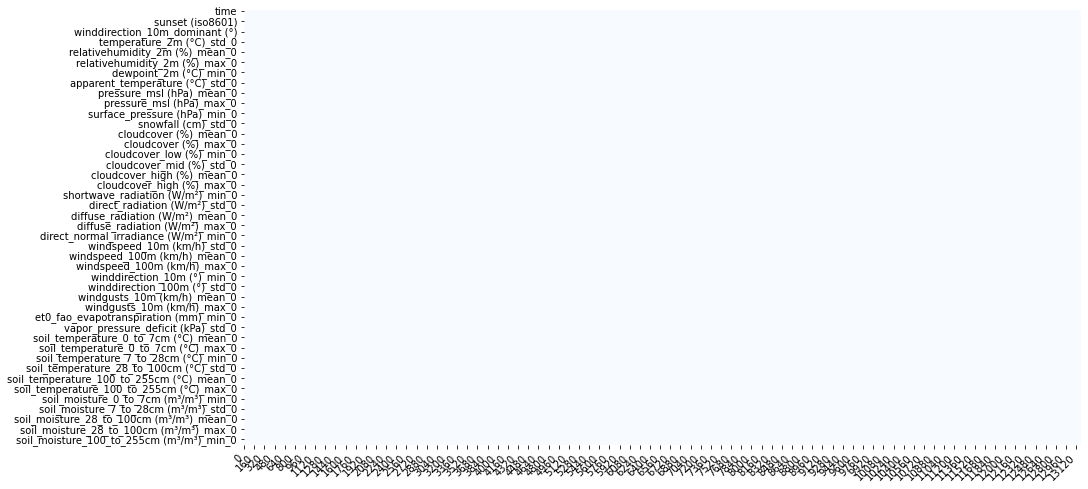

In [ ]:
df_train_merge = df_train_merge.fillna(df_train_merge.median())
plot_missing_value(df_train_merge)

ConversionError: ignored

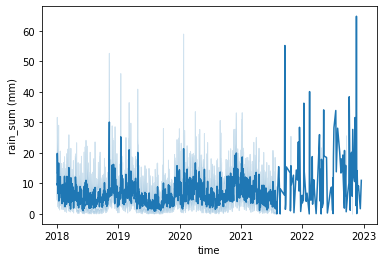

In [ ]:
time=range(1,13)
sns.lineplot(x = "time",y = "rain_sum (mm)", data = df_train_merge[df_train_merge.time > "2017-01-01"])
plt.xlim("2017-01-01","2023-01-01")
plt.xticks(time)
plt.ylabel('rain')
plt.xlabel('time')
plt.show()

In [ ]:
df_test_merge.info( )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4972 entries, 0 to 4971
Columns: 255 entries, time to soil_moisture_100_to_255cm (m³/m³)_max_12
dtypes: datetime64[ns](1), float64(250), int64(1), object(3)
memory usage: 9.7+ MB


In [ ]:
df_train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13198 entries, 0 to 13197
Columns: 256 entries, time to soil_moisture_100_to_255cm (m³/m³)_max_12
dtypes: datetime64[ns](1), float64(251), int64(1), object(3)
memory usage: 26.4+ MB


### Exploratory Data Analysis

In [ ]:
df_train_merge.dtypes

time                                         datetime64[ns]
temperature_2m_max (°C)                             float64
temperature_2m_min (°C)                             float64
apparent_temperature_max (°C)                       float64
apparent_temperature_min (°C)                       float64
                                                  ...      
soil_moisture_100_to_255cm (m³/m³)_std_12           float64
soil_moisture_100_to_255cm (m³/m³)_min_0            float64
soil_moisture_100_to_255cm (m³/m³)_min_12           float64
soil_moisture_100_to_255cm (m³/m³)_max_0            float64
soil_moisture_100_to_255cm (m³/m³)_max_12           float64
Length: 256, dtype: object

In [ ]:
df_train_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m_max (°C),13198.0,23.149848,12.853509,-30.000,18.600,28.900,31.300,38.900000
temperature_2m_min (°C),13198.0,17.404175,12.246267,-33.400,11.600,24.200,25.400,28.500000
apparent_temperature_max (°C),13198.0,26.705440,16.614654,-34.800,20.300,34.600,37.800,46.200000
apparent_temperature_min (°C),13198.0,19.711274,15.794364,-38.200,11.400,28.600,30.600,34.500000
shortwave_radiation_sum (MJ/m²),13198.0,17.043767,6.460664,0.000,13.610,18.430,21.520,32.420000
...,...,...,...,...,...,...,...,...
soil_moisture_100_to_255cm (m³/m³)_std_12,13198.0,0.000118,0.000251,0.000,0.000,0.000,0.000,0.004285
soil_moisture_100_to_255cm (m³/m³)_min_0,13198.0,0.325445,0.104572,0.073,0.253,0.355,0.404,0.460000
soil_moisture_100_to_255cm (m³/m³)_min_12,13198.0,0.325430,0.104566,0.073,0.253,0.355,0.404,0.460000
soil_moisture_100_to_255cm (m³/m³)_max_0,13198.0,0.325729,0.104635,0.073,0.253,0.356,0.404,0.461000


In [ ]:
df_train_merge.city.value_counts()

b     1339
t     1337
p     1320
si    1318
le    1318
lh    1318
u     1313
su    1312
sa    1312
q     1311
Name: city, dtype: int64

In [ ]:
df_train_merge["rain_sum (mm)"].value_counts()

0.0     3606
0.1      305
0.2      290
0.3      235
0.4      198
        ... 
73.0       1
66.2       1
56.0       1
67.2       1
40.3       1
Name: rain_sum (mm), Length: 498, dtype: int64

In [ ]:
data=df_train_merge.groupby(["city","rain_sum (mm)"]).count()
data

time  temperature_2m_max (°C)  temperature_2m_min (°C)  \
city rain_sum (mm)                                                           
b    0.0              62                       62                       62   
     0.1              18                       18                       18   
     0.2              25                       25                       25   
     0.3              26                       26                       26   
     0.4              13                       13                       13   
...                  ...                      ...                      ...   
u    59.9              1                        1                        1   
     66.1              1                        1                        1   
     68.2              1                        1                        1   
     92.0              1                        1                        1   
     107.9             1                        1                        1   

                    apparent_temperature_max (°C)  \
city rain_sum (mm)                                  
b    0.0                                       62   
     0.1                                       18   
     0.2                                       25   
     0.3                                       26   
     0.4                                       13   
...                                           ...   
u    59.9                                       1   
     66.1                                       1   
     68.2                                       1   
     92.0                                       1   
     107.9                                      1   

                    apparent_temperature_min (°C)  sunrise (iso8601)  \
city rain_sum (mm)                                                     
b    0.0                                       62                 62   
     0.1                                       18                 18   
     0.2                                       25                 25   
     0.3                                       26                 26   
     0.4                                       13                 13   
...                                           ...                ...   
u    59.9                                       1                  1   
     66.1                                       1                  1   
     68.2                                       1                  1   
     92.0                                       1                  1   
     107.9                                      1                  1   

                    sunset (iso8601)  shortwave_radiation_sum (MJ/m²)  \
city rain_sum (mm)                                                      
b    0.0                          62                               62   
     0.1                          18                               18   
     0.2                          25                               25   
     0.3                          26                               26   
     0.4                          13                               13   
...                              ...                              ...   
u    59.9                          1                                1   
     66.1                          1                                1   
     68.2                          1                                1   
     92.0                          1                                1   
     107.9                         1                                1   

                    snowfall_sum (cm)  windspeed_10m_max (km/h)  ...  \
city rain_sum (mm)                                               ...   
b    0.0                           62                        62  ...   
     0.1                           18                        18  ...   
     0.2                           25                        25  ...   
     0.3                           26                        26  ...

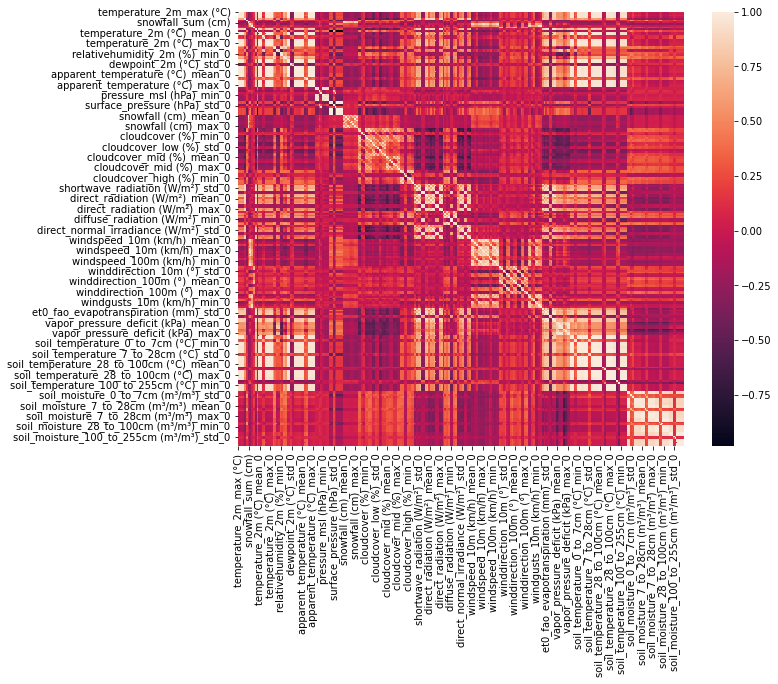

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train_merge.corr());

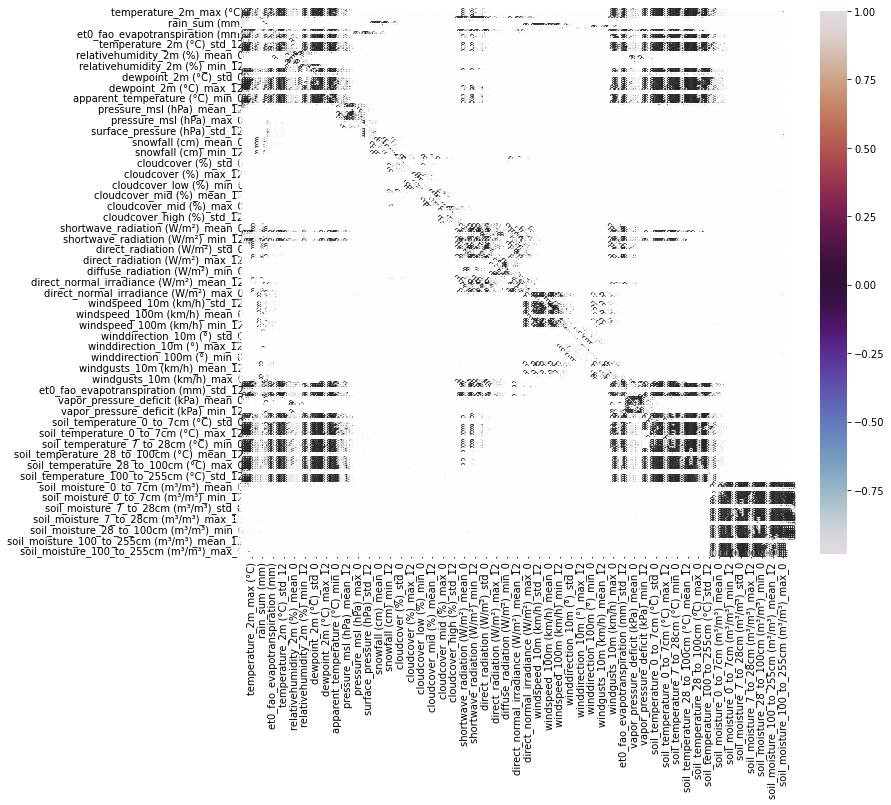

In [ ]:
#Plotting a correlation matrix
plt.figure(figsize = (12,10))
c = df_train_merge.corr()
sns.heatmap(c, annot = True, cmap = 'twilight')

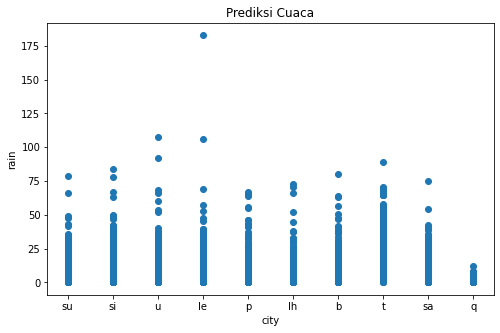

In [ ]:
plt.figure(figsize=[8,5])
plt.scatter(data=df_train_merge,x="city",y="rain_sum (mm)")
plt.title("Prediksi Cuaca")
plt.ylabel("rain")
plt.xlabel("city")
plt.show()

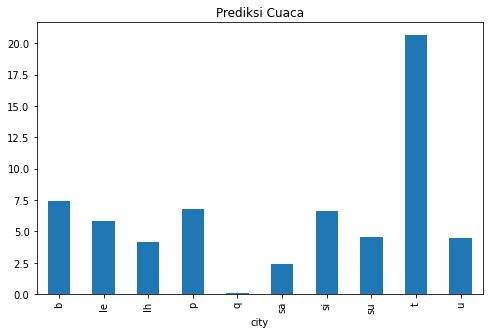

In [ ]:
plt.figure(figsize=[8,5])
df_train_merge.groupby('city')['rain_sum (mm)'].mean().plot(kind="bar")
plt.title("Prediksi Cuaca")
plt.show()

### pemodelan

In [ ]:
## Shuffle
X = df_train_merge.drop(columns="rain_sum (mm)")
y = df_train_merge["rain_sum (mm)"]

X_train, y_train = X[X.time < "2021-01-01"], y[X.time < "2021-01-01"]
X_test, y_test = X[X.time >= "2021-01-01"], y[X.time >= "2021-01-01"]
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((10960, 255), (10960,), (2238, 255), (2238,))

In [ ]:
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [ ]:
#COMMON
preprocessor = ColumnTransformer([
('numeric', num_pipe(transform = "yeo-johnson",impute = "mean"), X_train.select_dtypes("number").columns.tolist() ),
    ('categoric', cat_pipe(encoder='ordinal'), ["city"]),
])
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('transformer',
                                                  PowerTransformer())]),
                                 ['temperature_2m_max (°C)',
                                  'temperature_2m_min (°C)',
                                  'apparent_temperature_max (°C)',
                                  'apparent_temperature_min (°C)',
                                  'shortwave_radiation_sum (MJ/m²)',
                                  'snowfall_sum (cm)',
                                  'windspeed_10m_max (km/h)',
                                  'windgusts_10m_max (km/h)',
                                  'winddire...
                                  'relativehumidity_2m (%)_std_12',
                                  'relativehumidity_2m (%)_min_0',
                                  'relativehumidity_2

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier



from sklearn.svm import SVR
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])

In [ ]:
#RANDOMIZED SEARCH CV

from sklearn.model_selection import RandomizedSearchCV,KFold
from jcopml.tuning import random_search_params as rsp
from sklearn.metrics import mean_squared_error
lgbm_params = {}

cv = KFold(shuffle = True,random_state = 42,n_splits = 5)
#rsp.knn_params -> knn
#rsp.svm_params -> svm
model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=cv, scoring='neg_mean_squared_error', n_iter=100, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(mean_squared_error(y_train, model.predict(X_train)), model.best_score_, mean_squared_error(y_test,model.predict(X_test)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 42.42502238267331, 'algo__gamma': 0.0027814285643757547}
34.57123192198266 -32.04842838965643 34.58164402712614


In [ ]:
df_test_merge["rain_sum (mm)"] = model.predict(df_test_merge)
df_test_merge["rain_sum (mm)"].to_csv("submission_kaggle.csv",index_label = "id")